LIBRARY YANG AKAN DIGUNAKAN

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve,auc,accuracy_score
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import os
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
! pip install -q scikit-plot
import scikitplot as skplt

LOAD DATASET DARI GITHUB (DATASET DIDAPATKAN DARI UCI MACHINE LEARNING)

In [52]:
filename = 'https://raw.githubusercontent.com/NurulAfni/CART-RF/main/heart_failure_clinical_records_dataset.csv' #load data
data = pd.read_csv(filename, names=["age","anemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time","DEATH_EVENT"])
data.head(10) #menampilkan 10 data pertama

age  anemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0       0                       582  ...        0     4            1
1  55.0       0                      7861  ...        0     6            1
2  65.0       0                       146  ...        1     7            1
3  50.0       1                       111  ...        0     7            1
4  65.0       1                       160  ...        0     8            1
5  90.0       1                        47  ...        1     8            1
6  75.0       1                       246  ...        0    10            1
7  60.0       1                       315  ...        1    10            1
8  65.0       0                       157  ...        0    10            1
9  80.0       1                       123  ...        1    10            1

[10 rows x 13 columns]

RENTANG UMUR DALAM DATASET

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


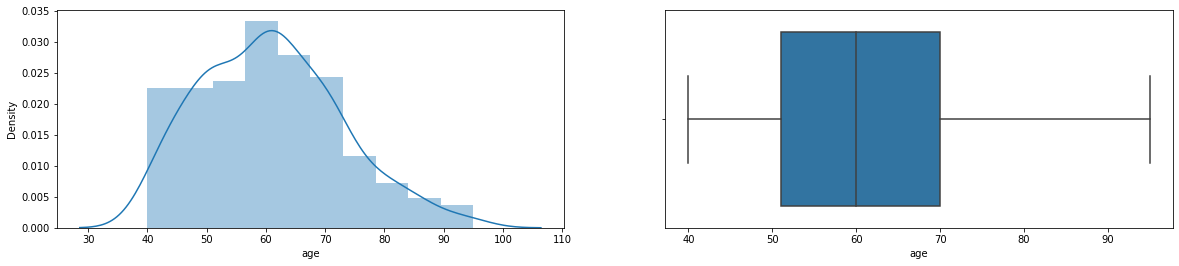

In [53]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['age'])

f.add_subplot(1,2,2)
sns.boxplot(data['age'])

CONFUSION MATRIX

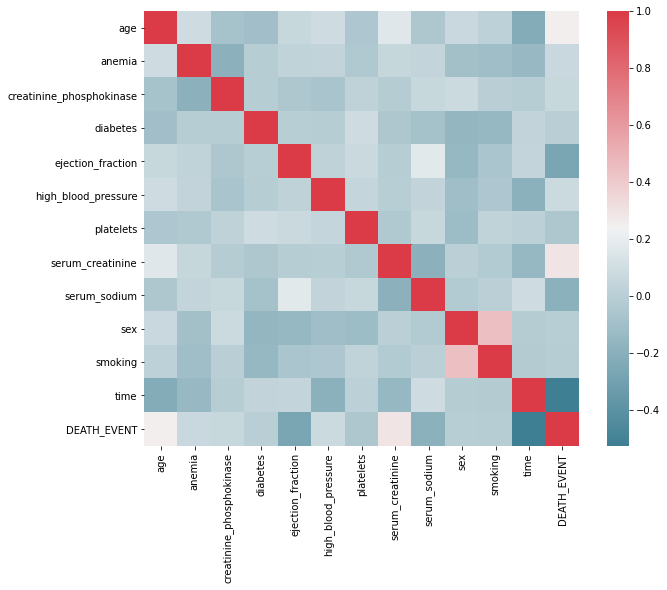

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

NORMALISASI DATASET MENGGUNAKAN MINMAXSCALER

In [55]:
from sklearn.preprocessing import MinMaxScaler
X=data.iloc[:,0:12].values
y=data.iloc[:,12].values
scaler = MinMaxScaler()

scaler_x= scaler.fit_transform(X)
print(scaler_x)

[[0.63636364 0.         0.07131921 ... 1.         0.         0.        ]
 [0.27272727 0.         1.         ... 1.         0.         0.00711744]
 [0.45454545 0.         0.01569278 ... 1.         1.         0.01067616]
 ...
 [0.09090909 0.         0.25988773 ... 0.         0.         0.97508897]
 [0.09090909 0.         0.30492473 ... 1.         1.         0.98220641]
 [0.18181818 0.         0.02207196 ... 1.         1.         1.        ]]


In [56]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y)

SPLIT DATASET DENGAN PERBANDINGAN DATA TES 30% DAN DATA TRAIN 70%

In [57]:
from imblearn.over_sampling import RandomOverSampler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)

os =  RandomOverSampler(random_state=123)
X_train1,y_train1 = os.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


PEMBANGUNAN MODEL TREE

In [58]:
model=DecisionTreeClassifier(criterion='gini', splitter='best',random_state=8)
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)

y_tested = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print('Accuracy Score train     : '  + str(accuracy_score(y_train,y_trained)))
print('Accuracy Score test      : '  + str(accuracy_score(y_test,y_tested)*100))
print("Precision Score          : " + str(precision_score(y_test, y_tested,average='macro')*100))
print("Recall Score             : " + str(recall_score(y_test, y_tested,average='macro')*100))
print('F1 Score                 : ' + str(f1_score(y_test,y_tested,average='macro')*100))

Confusion Matrix: 
 [[62  5]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.77      0.74      0.76        23

    accuracy                           0.88        90
   macro avg       0.84      0.83      0.84        90
weighted avg       0.88      0.88      0.88        90

Accuracy Score train     : 1.0
Accuracy Score test      : 87.77777777777777
Precision Score          : 84.22459893048129
Recall Score             : 83.22517845554835
F1 Score                 : 83.7037037037037


CONFUSION MATRIX DENGAN BENTUK PERSENTASE

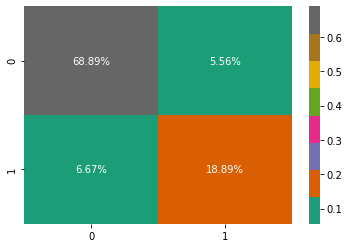

In [59]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Dark2')

HASIL POHON KLASIFIKASI MAKSIMAL

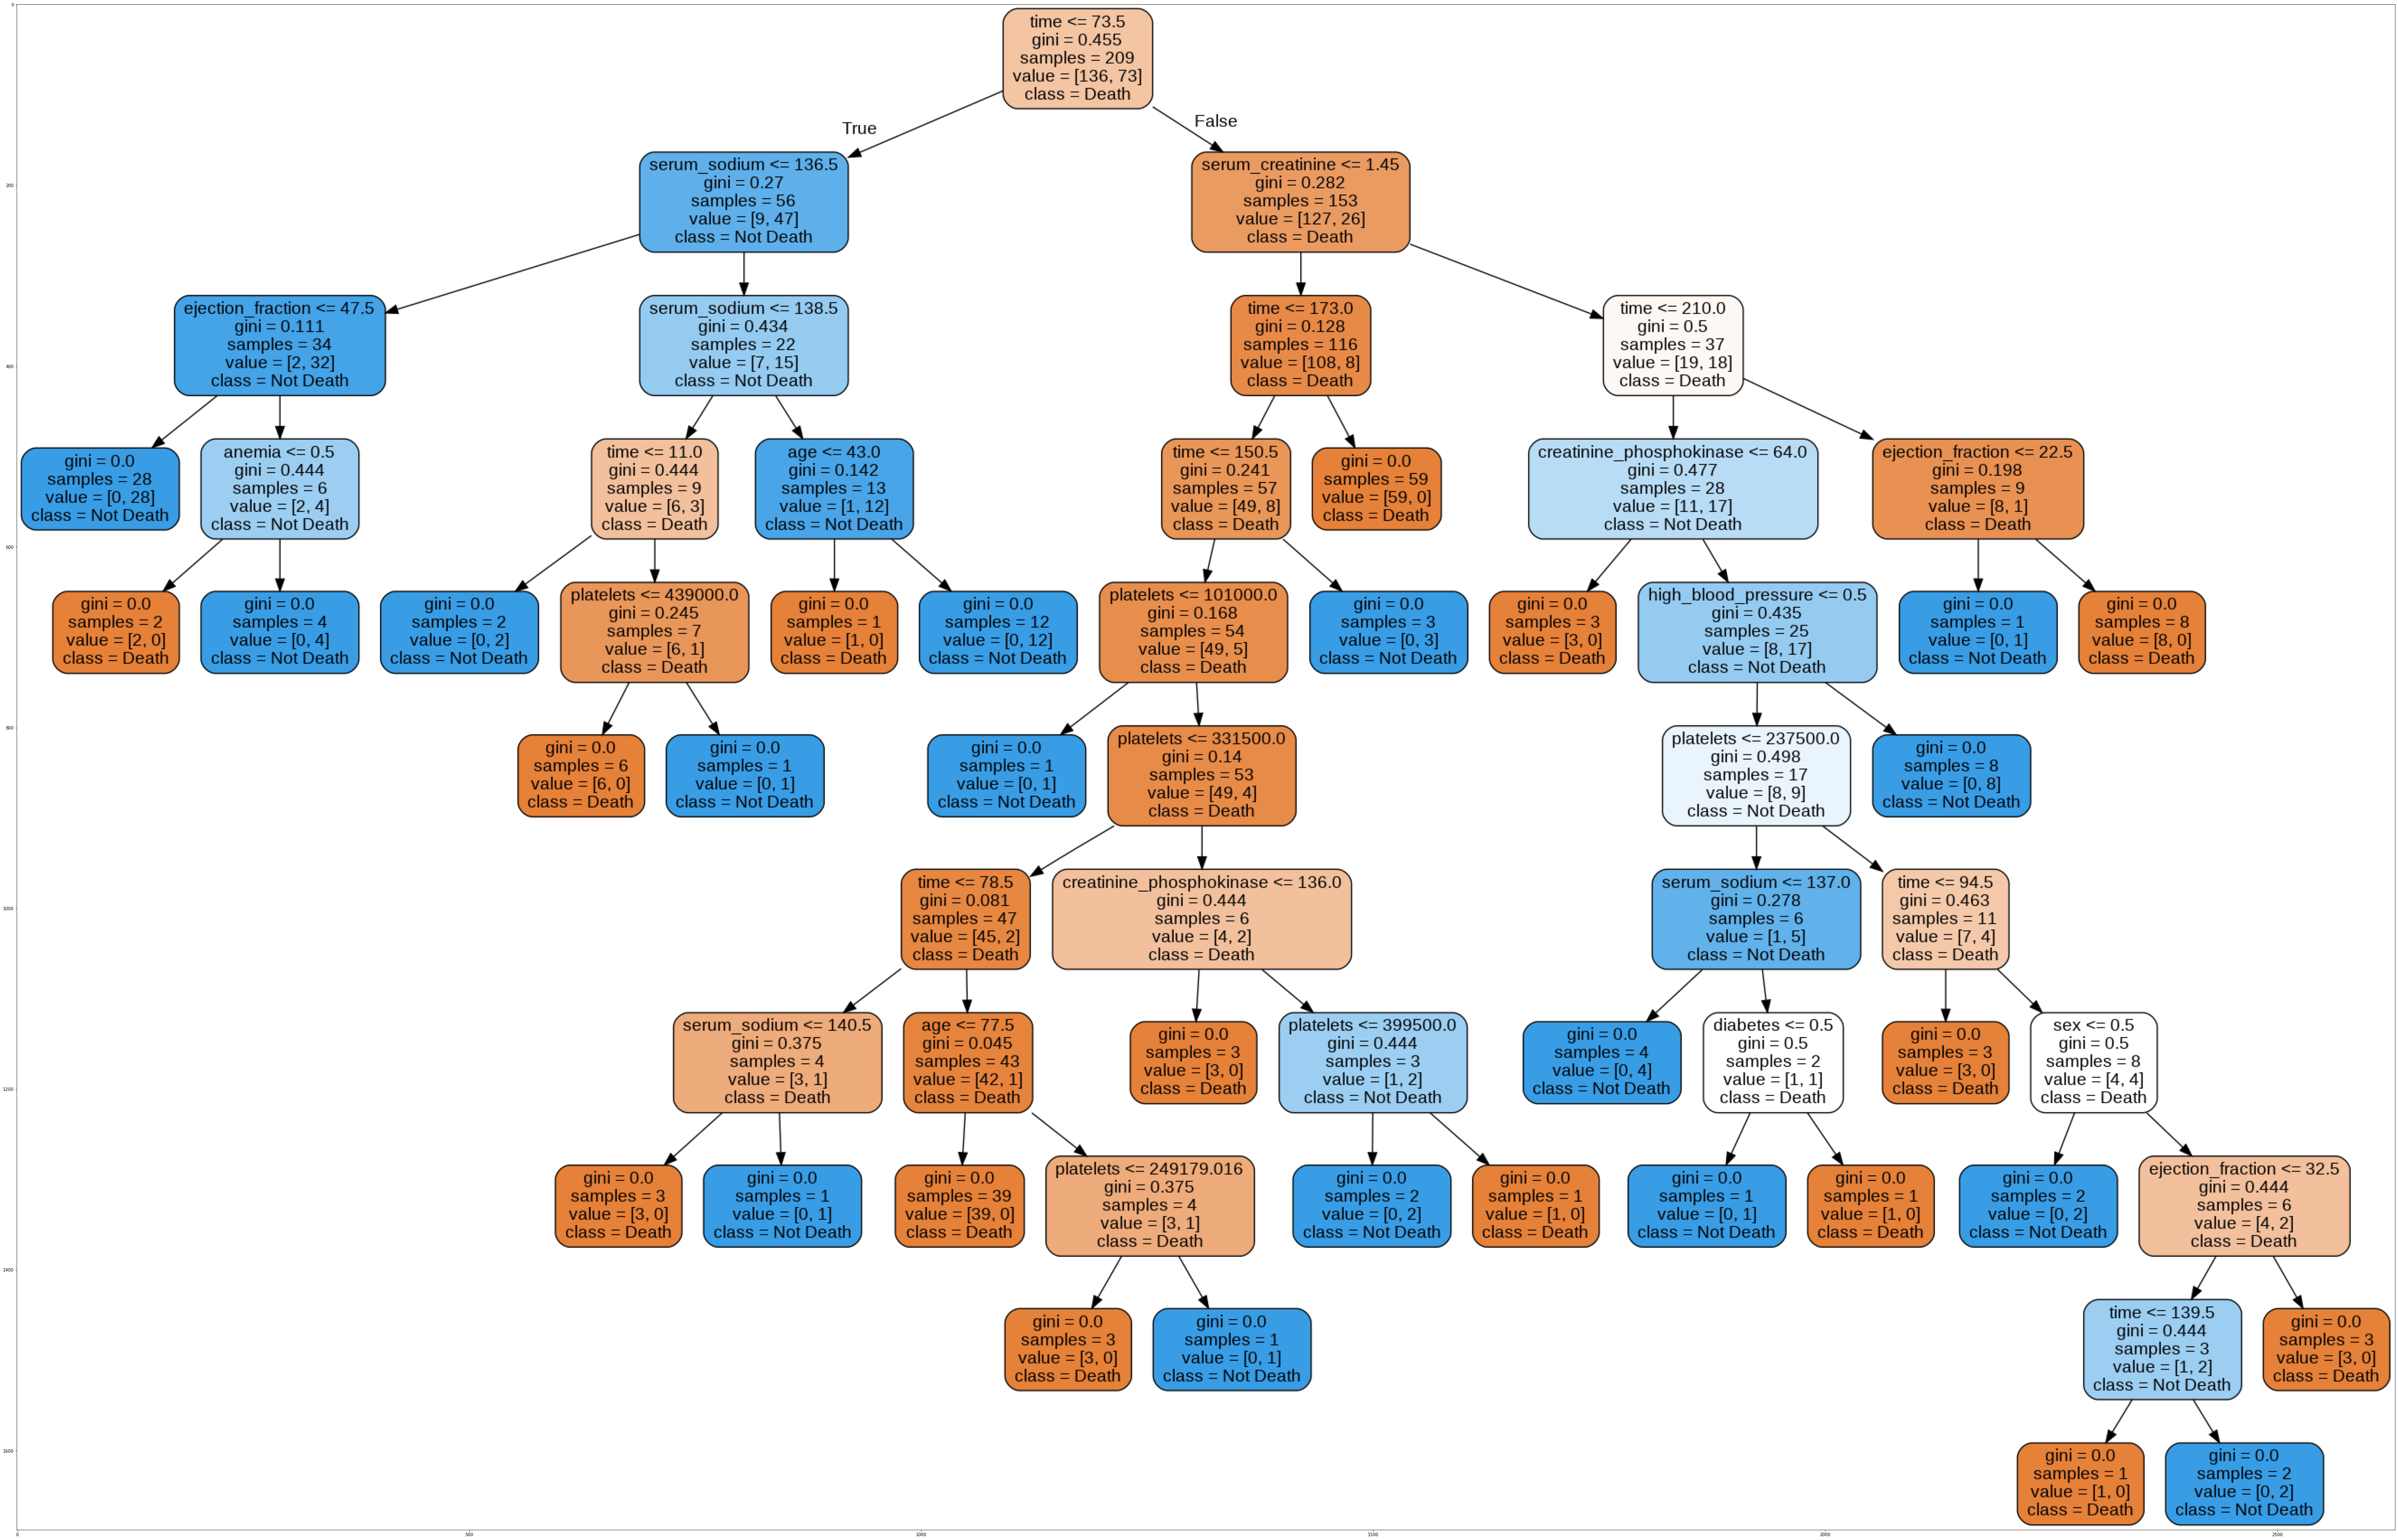

In [60]:
rt = model.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True,rounded=True, class_names =['Death','Not Death'],label='all', feature_names=["age","anemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

MENCARI NILAI ALPHA

In [61]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.00398724 0.00458109 0.0056881  0.0060896  0.00802798
 0.00819623 0.00820232 0.00850611 0.00883327 0.00900647 0.01093643
 0.01152829 0.01185236 0.013149   0.01392937 0.0160362  0.04679598
 0.17576193]


MEMBANGUN POHON UNTUK SETIAP NILAI CCP_ALPHA

[1.0, 0.9952153110047847, 0.9856459330143541, 0.9760765550239234, 0.9569377990430622, 0.9521531100478469, 0.937799043062201, 0.9330143540669856, 0.9282296650717703, 0.9234449760765551, 0.9138755980861244, 0.9043062200956937, 0.9043062200956937, 0.8899521531100478, 0.8755980861244019, 0.861244019138756, 0.8325358851674641, 0.8325358851674641, 0.6507177033492823]
[0.8666666666666667, 0.8666666666666667, 0.8555555555555555, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8555555555555555, 0.8555555555555555, 0.8555555555555555, 0.8555555555555555, 0.8555555555555555, 0.8222222222222222, 0.8222222222222222, 0.8, 0.8333333333333334, 0.8444444444444444, 0.8777777777777778, 0.8777777777777778, 0.7444444444444445]


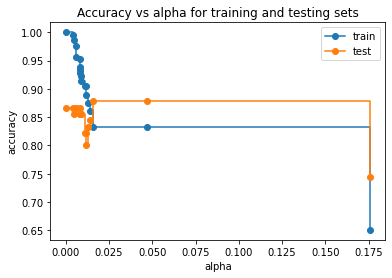

In [62]:
tree_list = []
accuracy_train,accuracy_test=[],[]

for alpha in ccp_alphas:
    tree1 = DecisionTreeClassifier(criterion='gini',random_state=42,ccp_alpha=alpha, splitter='best')
    tree1.fit(X_train,y_train)
    tree_list.append(tree1)
  
training_score = [model.score(X_train,y_train) for model in tree_list]
testing_score = [model.score(X_test,y_test) for model in tree_list]

print(training_score)
print(testing_score)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, training_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, testing_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

model_list.head()

alpha  train score  test score  score diff
0  0.000000     1.000000    0.866667    0.133333
1  0.003987     0.995215    0.866667    0.128549
2  0.004581     0.985646    0.855556    0.130090
3  0.005688     0.976077    0.866667    0.109410
4  0.006090     0.956938    0.866667    0.090271

In [64]:
model_list[model_list['score diff']==model_list['score diff'].min()]

alpha  train score  test score  score diff
18  0.175762     0.650718    0.744444   -0.093727

MENCARI NILAI ALPHA TERBAIK BERDASARKAN HASIL TRAIN DAN TEST SCORE

In [65]:
model_list[model_list['test score']==model_list['test score'].max()]

alpha  train score  test score  score diff
16  0.016036     0.832536    0.877778   -0.045242
17  0.046796     0.832536    0.877778   -0.045242

PROSES LEARNING DENGAN CCP_ALPHA, DIMANA AKAN MENGHASILKAN MODEL POHON KLASIFIKASI OPTIMAL

In [66]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.016036, criterion='gini',splitter='best',random_state=8)

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
y_tested = model_pruned.predict(X_test)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print('Accuracy Score train     : '  + str(accuracy_score(y_train,y_trained)))
print('Accuracy Score test      : '  + str(accuracy_score(y_test,y_tested)))
print('\n')
print("Precision Score macro         : " + str(precision_score(y_test, y_tested,average='macro')))
print("Recall Score    macro         : " + str(recall_score(y_test, y_tested,average='macro')))
print('F1 Score        macro         : ' + str(f1_score(y_test,y_tested,average='macro')))
print('\n')
print("Precision Score weighted      : " + str(precision_score(y_test, y_tested,average='weighted')))
print("Recall Score    weighted      : " + str(recall_score(y_test, y_tested,average='weighted')))
print('F1 Score        weighted      : ' + str(f1_score(y_test,y_tested,average='weighted')))

Confusion Matrix: 
 [[58  9]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.67      0.78      0.72        23

    accuracy                           0.84        90
   macro avg       0.79      0.82      0.81        90
weighted avg       0.86      0.84      0.85        90

Accuracy Score train     : 0.861244019138756
Accuracy Score test      : 0.8444444444444444


Precision Score macro         : 0.7936507936507936
Recall Score    macro         : 0.8241401687216093
F1 Score        macro         : 0.8061538461538461


Precision Score weighted      : 0.855731922398589
Recall Score    weighted      : 0.8444444444444444
F1 Score        weighted      : 0.8482735042735042


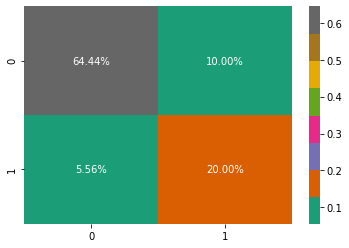

In [67]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Dark2')

PLOT POHON KLASIFIKASI OPTIMAL

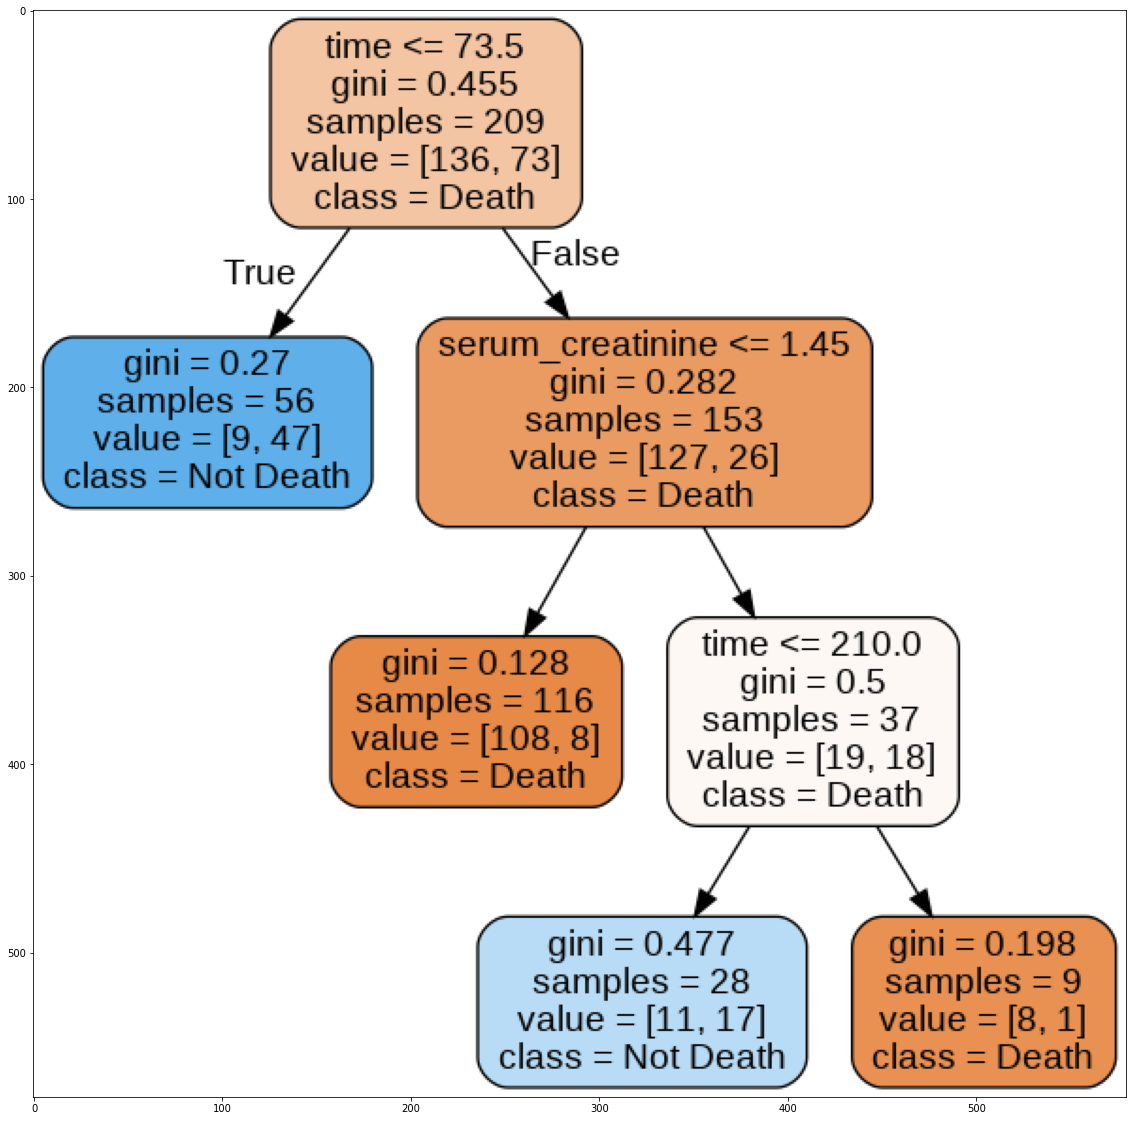

In [68]:
rt = model_pruned.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True,impurity=True,rounded=True, class_names =['Death','Not Death'],label='all', feature_names=["age","anemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('1.png')

plt.figure(figsize=(20, 20))
img = mpimg.imread('1.png')
imgplot = plt.imshow(img)

plt.show()

**RANDOM** **FOREST**

MEMBANGUN MODEL UNTUK RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =33)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[61  6]
 [ 9 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        67
           1       0.70      0.61      0.65        23

    accuracy                           0.83        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.83      0.83      0.83        90

Accuracy: 0.8333333333333334


FITUR PENTING

In [70]:
clf.feature_importances_

array([0.07956467, 0.01253499, 0.08364932, 0.01206851, 0.12350202,
       0.01386505, 0.09831469, 0.16023496, 0.07364369, 0.01291127,
       0.0122259 , 0.31748493])

In [71]:
features = data.columns.values.tolist()[0:12]
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

time                        0.317485
serum_creatinine            0.160235
ejection_fraction           0.123502
platelets                   0.098315
creatinine_phosphokinase    0.083649
age                         0.079565
serum_sodium                0.073644
high_blood_pressure         0.013865
sex                         0.012911
anemia                      0.012535
smoking                     0.012226
diabetes                    0.012069
dtype: float64

VISUALISASI FITUR PENTING

No handles with labels found to put in legend.


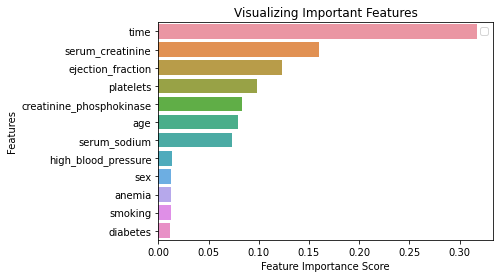

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
# Print X_train
print(X_train[:5])

[[4.200e+01 0.000e+00 1.020e+02 1.000e+00 4.000e+01 0.000e+00 2.370e+05
  1.200e+00 1.400e+02 1.000e+00 0.000e+00 7.400e+01]
 [4.500e+01 0.000e+00 2.442e+03 1.000e+00 3.000e+01 0.000e+00 3.340e+05
  1.100e+00 1.390e+02 1.000e+00 0.000e+00 1.290e+02]
 [7.000e+01 0.000e+00 6.600e+01 1.000e+00 4.500e+01 0.000e+00 2.490e+05
  8.000e-01 1.360e+02 1.000e+00 1.000e+00 8.000e+01]
 [8.500e+01 1.000e+00 9.100e+02 0.000e+00 5.000e+01 0.000e+00 2.350e+05
  1.300e+00 1.340e+02 1.000e+00 0.000e+00 1.210e+02]
 [4.000e+01 0.000e+00 2.440e+02 0.000e+00 4.500e+01 1.000e+00 2.750e+05
  9.000e-01 1.400e+02 0.000e+00 0.000e+00 1.740e+02]]


In [74]:
# Print y_train
for i in range(len(y_train)):
    y_train[i] = y_train[i]-1
print(y_train[:5])

[-1  0 -1 -1 -1]


In [75]:
# Print X_test
print(X_test[:5])

[[4.500e+01 0.000e+00 2.413e+03 0.000e+00 3.800e+01 0.000e+00 1.400e+05
  1.400e+00 1.400e+02 1.000e+00 1.000e+00 2.800e+02]
 [4.500e+01 1.000e+00 1.876e+03 1.000e+00 3.500e+01 0.000e+00 2.260e+05
  9.000e-01 1.380e+02 1.000e+00 0.000e+00 8.800e+01]
 [6.500e+01 1.000e+00 3.350e+02 0.000e+00 3.500e+01 1.000e+00 2.350e+05
  8.000e-01 1.360e+02 0.000e+00 0.000e+00 1.200e+02]
 [5.900e+01 1.000e+00 1.760e+02 1.000e+00 2.500e+01 0.000e+00 2.210e+05
  1.000e+00 1.360e+02 1.000e+00 1.000e+00 1.500e+02]
 [9.500e+01 1.000e+00 3.710e+02 0.000e+00 3.000e+01 0.000e+00 4.610e+05
  2.000e+00 1.320e+02 1.000e+00 0.000e+00 5.000e+01]]


In [76]:
# Print y_test
for i in range(len(y_test)):
    y_test[i] = y_test[i]-1
print(y_test[:5])

[-1 -1 -1  0  0]
